In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime

In [2]:
start=datetime.datetime(2012,1,1)
end=datetime.datetime(2017,1,1)

In [6]:
tesla=web.DataReader("TSLA",'yahoo',start,end)
ford=web.DataReader("F",'yahoo',start,end)
gm=web.DataReader("GM",'yahoo',start,end)

In [8]:
gm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.640026
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.719082
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,17.525387
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,18.118261
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,18.055021


In [9]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.946151
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,8.067521
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,8.274564
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,8.360237
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,8.424490


In [10]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000


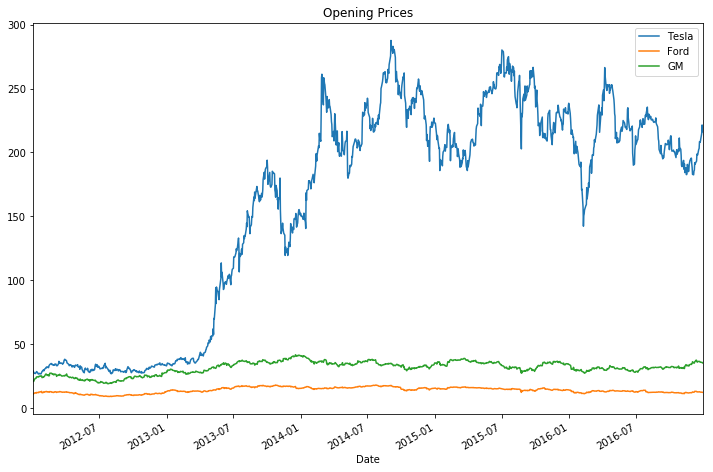

In [11]:
tesla['Open'].plot(label='Tesla',figsize=(12,8),title="Opening Prices")
ford['Open'].plot(label='Ford',figsize=(12,8),title="Opening Prices")
gm['Open'].plot(label='GM',figsize=(12,8),title="Opening Prices")
plt.legend()

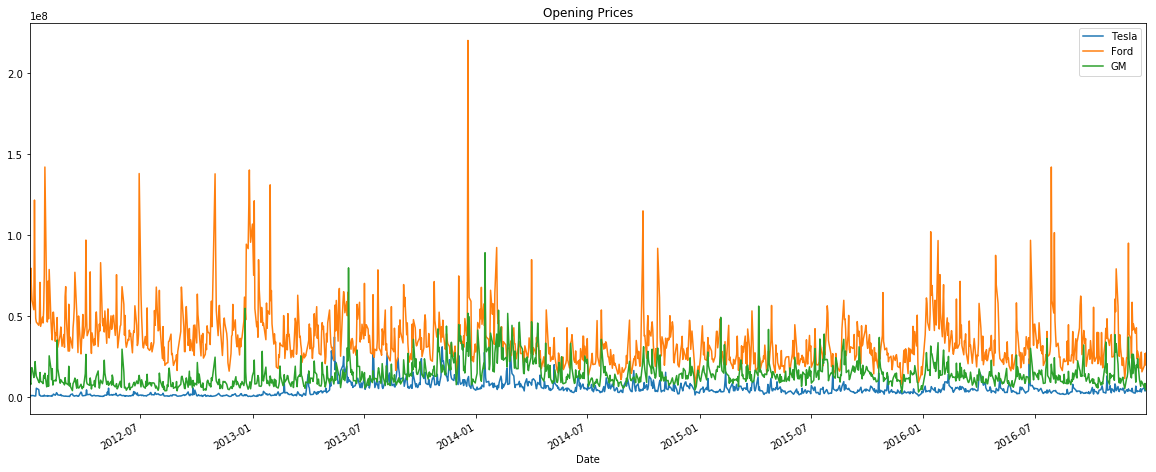

In [14]:
tesla['Volume'].plot(label='Tesla',figsize=(20,8),title="Opening Prices")
ford['Volume'].plot(label='Ford',figsize=(20,8),title="Opening Prices")
gm['Volume'].plot(label='GM',figsize=(20,8),title="Opening Prices")
plt.legend()

In [15]:
tesla["Total Trade"]=tesla['Open']*tesla['Volume']
ford["Total Trade"]=ford['Open']*ford['Volume']
gm["Total Trade"]=gm['Open']*gm['Volume']

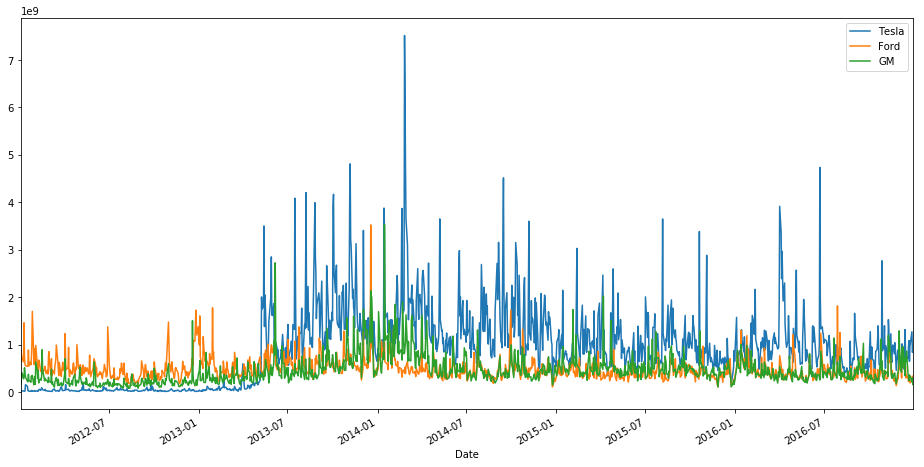

In [17]:
tesla["Total Trade"].plot(label='Tesla',figsize=(16,8))
ford["Total Trade"].plot(label='Ford',figsize=(16,8))
gm["Total Trade"].plot(label='GM',figsize=(16,8))
plt.legend()

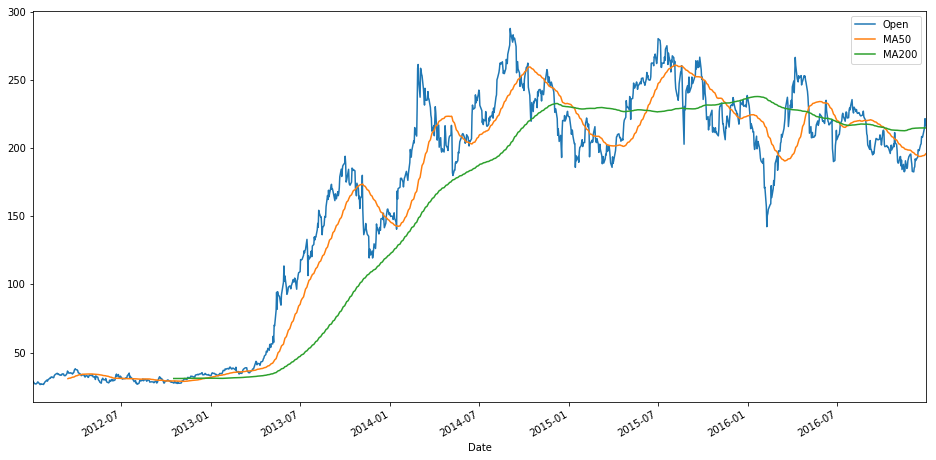

In [18]:
tesla["MA50"]=tesla["Open"].rolling(50).mean()
tesla["MA200"]=tesla["Open"].rolling(200).mean()
tesla[["Open","MA50","MA200"]].plot(figsize=(16,8))

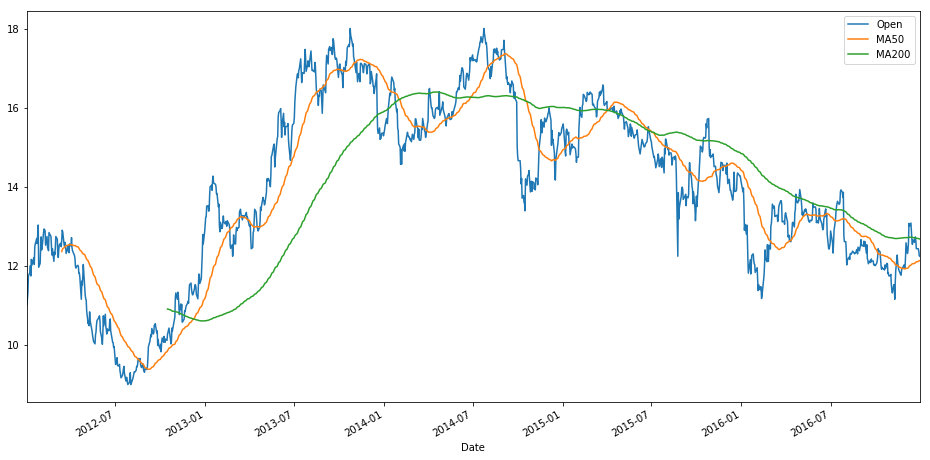

In [19]:
ford["MA50"]=ford["Open"].rolling(50).mean()
ford["MA200"]=ford["Open"].rolling(200).mean()
ford[["Open","MA50","MA200"]].plot(figsize=(16,8))

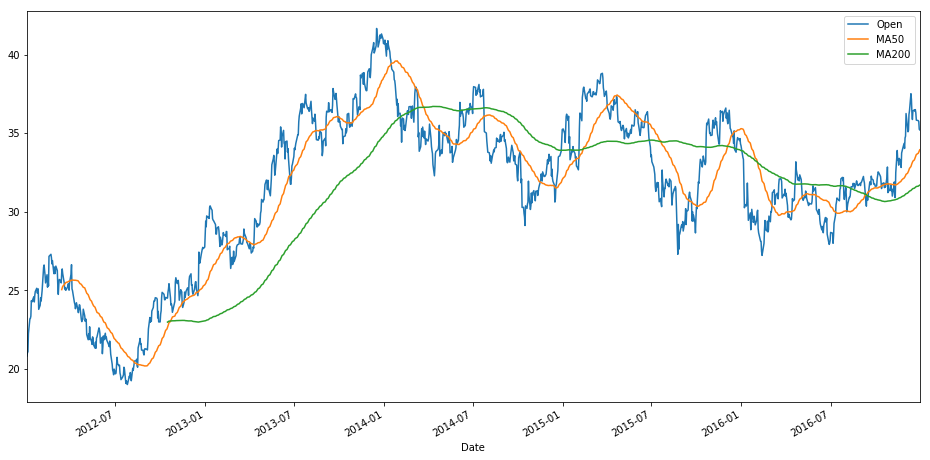

In [20]:
gm["MA50"]=gm["Open"].rolling(50).mean()
gm["MA200"]=gm["Open"].rolling(200).mean()
gm[["Open","MA50","MA200"]].plot(figsize=(16,8))

In [21]:
from pandas.plotting import scatter_matrix
car_comp=pd.concat([tesla["Open"],gm["Open"],ford["Open"]],axis=1)
car_comp.columns=["Tesla Open","GM Open","Ford Open"]
car_comp.head()

,Tesla Open,GM Open,Ford Open
Date,,,
2012-01-03,28.940001,20.830000,11.00
2012-01-04,28.209999,21.049999,11.15
2012-01-05,27.760000,21.100000,11.33
2012-01-06,27.200001,22.260000,11.74
2012-01-09,27.000000,23.200001,11.83


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001742AE28390>,
      dtype=object)

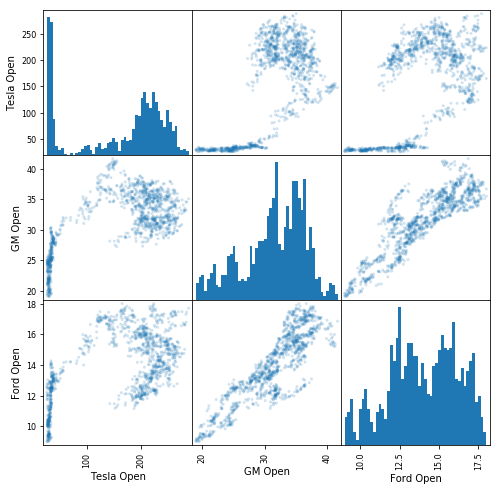

In [29]:
scatter_matrix(car_comp,figsize=(8,8),alpha=0.2,hist_kwds={"bins":50})

In [35]:
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter,date2num,WeekdayLocator,DayLocator,MONDAY

In [40]:
ford_reset=ford.loc['2012-01'].reset_index()
ford_reset["date-ax"]=ford_reset["Date"].apply(lambda date:date2num(date))
ford_reset.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Total Trade,MA50,MA200,date-ax
0,2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.946151,5.028089e+08,NaN,NaN,734505.0
1,2012-01-04,11.53,11.07,11.15,11.30,79725200.0,8.067521,8.889359e+08,NaN,NaN,734506.0
2,2012-01-05,11.63,11.24,11.33,11.59,67877500.0,8.274564,7.690521e+08,NaN,NaN,734507.0
3,2012-01-06,11.80,11.52,11.74,11.71,59840700.0,8.360237,7.025298e+08,NaN,NaN,734508.0
4,2012-01-09,11.95,11.70,11.83,11.80,53981500.0,8.424490,6.386011e+08,NaN,NaN,734511.0


In [38]:
list_of_cols=["date-ax","Open","High","Low","Close"]
ford_values=[tuple(vals) for vals in ford_reset[list_of_cols].values]

In [46]:
tesla_reset=tesla.loc['2012-01'].reset_index()
tesla_reset["date-ax"]=tesla_reset["Date"].apply(lambda date:date2num(date))
tesla_reset.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Total Trade,MA50,MA200,date-ax
0,2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000,2.685921e+07,NaN,NaN,734505.0
1,2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999,1.777512e+07,NaN,NaN,734506.0
2,2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001,2.791268e+07,NaN,NaN,734507.0
3,2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000,2.682736e+07,NaN,NaN,734508.0
4,2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000,2.421900e+07,NaN,NaN,734511.0


In [48]:
list_of_cols=["date-ax","Open","High","Low","Close"]
tesla_values=[tuple(vals) for vals in tesla_reset[list_of_cols].values]

In [49]:
gm_reset=gm.loc['2012-01'].reset_index()
gm_reset["date-ax"]=gm_reset["Date"].apply(lambda date:date2num(date))
gm_reset.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Total Trade,MA50,MA200,date-ax
0,2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.640026,1.941627e+08,NaN,NaN,734505.0
1,2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.719082,1.653835e+08,NaN,NaN,734506.0
2,2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,17.525387,3.772807e+08,NaN,NaN,734507.0
3,2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,18.118261,4.059000e+08,NaN,NaN,734508.0
4,2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,18.055021,2.803604e+08,NaN,NaN,734511.0


In [50]:
list_of_cols=["date-ax","Open","High","Low","Close"]
gm_values=[tuple(vals) for vals in gm_reset[list_of_cols].values]

In [44]:
mondays=WeekdayLocator(MONDAY)  #major ticks on monday
alldays=DayLocator()            #minor ticks on monday
weekFormatter=DateFormatter("%b %d")   #eg Jan 12
dayFormatter=DateFormatter("%d")

([<matplotlib.lines.Line2D at 0x17421cf44a8>,
  <matplotlib.patches.Rectangle at 0x1742c4d3438>])

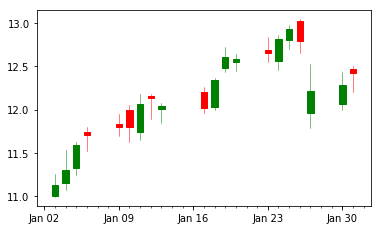

In [45]:
fig,ax=plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)
candlestick_ohlc(ax,ford_values,width=0.6,colorup='g',colordown='r')

([<matplotlib.lines.Line2D at 0x1742c53d588>,
  <matplotlib.patches.Rectangle at 0x1742c5cb898>])

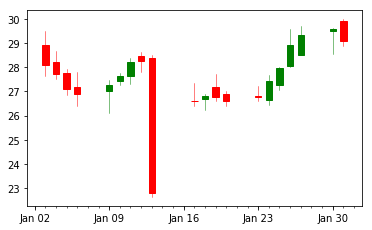

In [51]:
fig,ax=plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)
candlestick_ohlc(ax,tesla_values,width=0.6,colorup='g',colordown='r')

([<matplotlib.lines.Line2D at 0x1742c720780>,
  <matplotlib.patches.Rectangle at 0x1742c7bfbe0>])

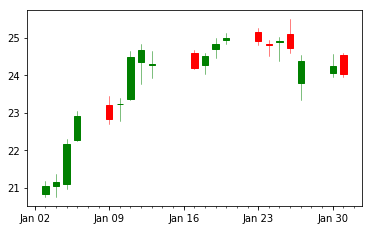

In [53]:
fig,ax=plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)
candlestick_ohlc(ax,gm_values,width=0.6,colorup='g',colordown='r')

In [56]:
tesla["returns"]=(tesla["Close"]/tesla["Close"].shift(1))-1
tesla["returns"]=tesla["Close"].pct_change(1)
tesla["returns"].head()  #-ve for money loss

Date
2012-01-03         NaN
2012-01-04   -0.013177
2012-01-05   -0.021292
2012-01-06   -0.007743
2012-01-09    0.012635
Name: returns, dtype: float64

In [57]:
ford["returns"]=(ford["Close"]/ford["Close"].shift(1))-1
ford["returns"]=ford["Close"].pct_change(1)
ford["returns"].head()   #-ve for money loss

Date
2012-01-03         NaN
2012-01-04    0.015274
2012-01-05    0.025664
2012-01-06    0.010354
2012-01-09    0.007686
Name: returns, dtype: float64

In [58]:
gm["returns"]=(gm["Close"]/gm["Close"].shift(1))-1
gm["returns"]=gm["Close"].pct_change(1)
gm["returns"].head()     #-ve for money loss

Date
2012-01-03         NaN
2012-01-04    0.004751
2012-01-05    0.048227
2012-01-06    0.033829
2012-01-09   -0.003490
Name: returns, dtype: float64

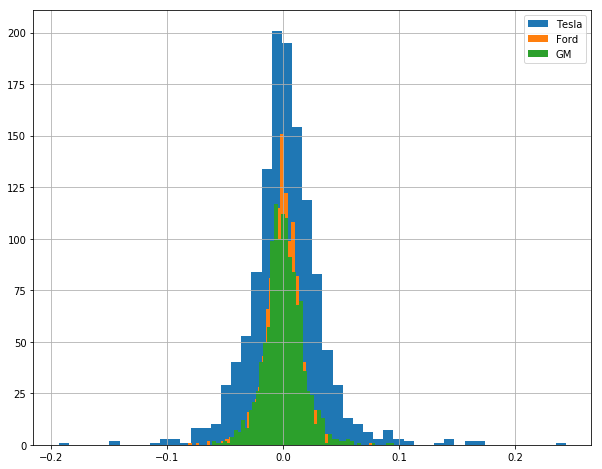

In [64]:
tesla["returns"].hist(bins=50,label="Tesla",figsize=(10,8))
ford["returns"].hist(bins=50,label="Ford",figsize=(10,8))
gm["returns"].hist(bins=50,label="GM",figsize=(10,8))
plt.legend()

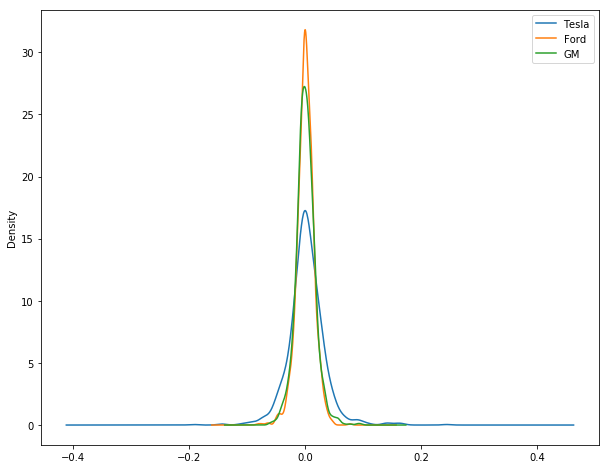

In [65]:
tesla["returns"].plot(kind='kde',label="Tesla",figsize=(10,8))
ford["returns"].plot(kind='kde',label="Ford",figsize=(10,8))
gm["returns"].plot(kind='kde',label="GM",figsize=(10,8))
plt.legend()

In [66]:
box_df=pd.concat([tesla['returns'],ford['returns'],gm['returns']],axis=1)
box_df.columns=['Tesla Returns','Ford Returns','GM Returns']

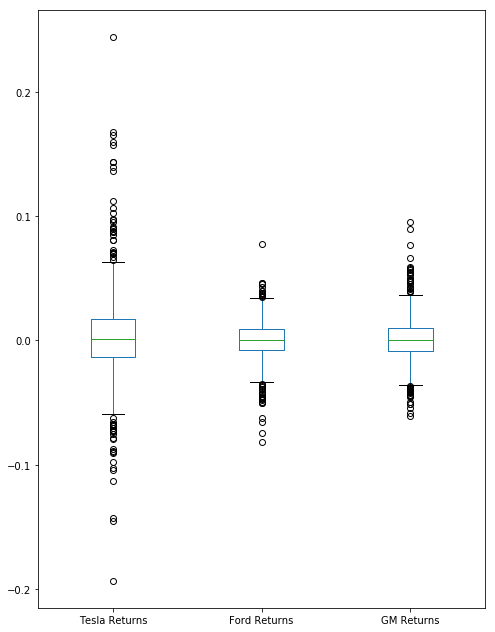

In [67]:
box_df.plot(kind='box',figsize=(8,11))

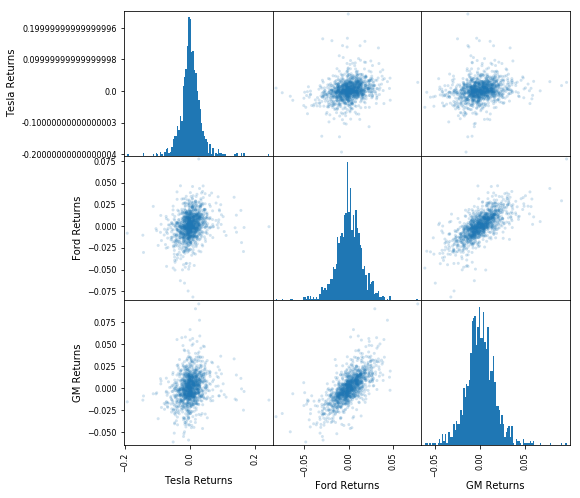

In [68]:
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':100});

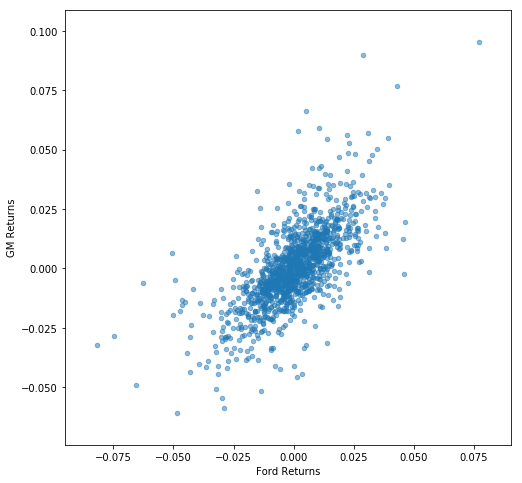

In [69]:
box_df.plot(kind='scatter',x="Ford Returns",y="GM Returns",alpha=0.5,figsize=(8,8))

In [70]:
tesla["Cummulative Returns"]=(1+tesla["returns"]).cumprod()
ford["Cummulative Returns"]=(1+ford["returns"]).cumprod()
gm["Cummulative Returns"]=(1+gm["returns"]).cumprod()

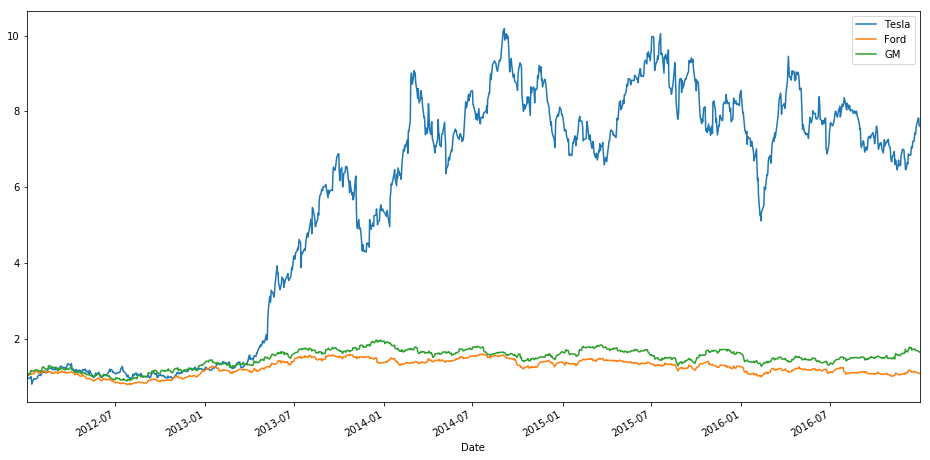

In [72]:
tesla["Cummulative Returns"].plot(label="Tesla",figsize=(16,8))
ford["Cummulative Returns"].plot(label="Ford",figsize=(16,8))
gm["Cummulative Returns"].plot(label="GM",figsize=(16,8))
plt.legend()